In [29]:
#-------------------------
# Libs
#-------------------------
 
# External libs
# %matplotlib qt
import pymysql.cursors
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [3]:
#-------------------------
# SQL environments
#-------------------------
 
HOST = "localhost"
USER = "root" 
PASSWORD = "Is79t5Is79t5"
DB = "ercot_data"

#-------------------------
# Functions
#-------------------------
"""
Make a connection to MySQL
Execute the MySQL query and return the resutls
"""

def execute_dict_query(query):
    connection = pymysql.connect(host=HOST, 
                                 user=USER, 
                                 password=PASSWORD, 
                                 db=DB, 
                                 port=3306,
                                 cursorclass=pymysql.cursors.DictCursor)
    
    try:
        with connection.cursor() as cursor:
            # Create a new record
            cursor.execute(query)
            result = cursor.fetchall()
            return result
    finally:
        connection.close()

 


In [55]:
# Query 2 years of data sorted by date and hour
result_dict = execute_dict_query('select * from DAM_LMP0  \
                                where delivery_date < "2012-12-31" \
                                and delivery_date > "2011-01-01" \
                                order by delivery_date, hour_ending')

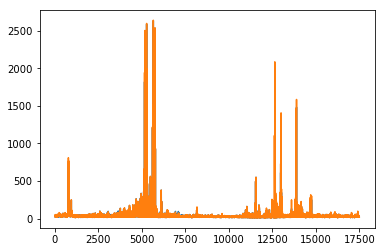

[3600.0, 7200.0, 10800.0, 14400.0, 18000.0, 21600.0, 25200.0, 28800.0, 32400.0, 36000.0, 39600.0, 43200.0, 46800.0, 50400.0, 54000.0, 57600.0, 61200.0, 64800.0, 68400.0, 72000.0, 75600.0, 79200.0, 82800.0, 86400.0, 3600.0, 7200.0, 10800.0, 14400.0, 18000.0, 21600.0, 25200.0, 28800.0, 32400.0, 36000.0, 39600.0, 43200.0, 46800.0, 50400.0, 54000.0, 57600.0, 61200.0, 64800.0, 68400.0, 72000.0, 75600.0, 79200.0, 82800.0, 86400.0, 3600.0, 7200.0, 10800.0, 14400.0, 18000.0, 21600.0, 25200.0, 28800.0, 32400.0, 36000.0, 39600.0, 43200.0, 46800.0, 50400.0, 54000.0, 57600.0, 61200.0, 64800.0, 68400.0, 72000.0, 75600.0, 79200.0, 82800.0, 86400.0, 3600.0, 7200.0, 10800.0, 14400.0, 18000.0, 21600.0, 25200.0, 28800.0, 32400.0, 36000.0, 39600.0, 43200.0, 46800.0, 50400.0, 54000.0, 57600.0, 61200.0, 64800.0, 68400.0, 72000.0, 75600.0, 79200.0, 82800.0, 86400.0, 3600.0, 7200.0, 10800.0, 14400.0, 18000.0, 21600.0, 25200.0, 28800.0, 32400.0, 36000.0, 39600.0, 43200.0, 46800.0, 50400.0, 54000.0, 57600.0, 6

In [57]:
#Extract some data
prices1 = [i['n0001VICTOR'] for i in result_dict]
prices2 = [i['n0001'] for i in result_dict]
hours = [i['hour_ending'].total_seconds() for i in result_dict]
dates = [i['delivery_date'] for i in result_dict]
plt.plot(prices1)
plt.plot(prices2)
plt.show()

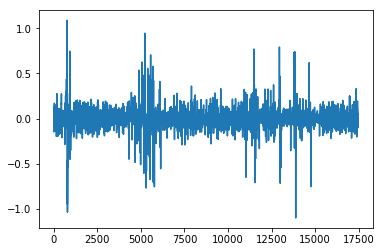

11.98669494391441608776131694


In [5]:
# Percent Change
k = 24
p_t = np.array(prices1[k:])
p_tk = np.array(prices1[:-k])
v = np.log10(p_t) - np.log10(p_tk)
plt.plot(v)
plt.show()

MAPE = np.mean(np.square(p_t-p_tk)/p_t)
print(MAPE)

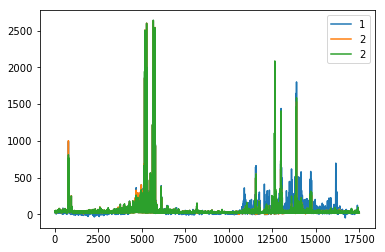

In [25]:
# Basic data plot
price1 = [float(i['AMNCOWD_8']) for i in result_dict]
price2 = [float(i['AZLES_K']) for i in result_dict]
price3 = [float(i['n0001']) for i in result_dict]

plt.plot(price1, label='1')
plt.plot(price2, label='2')
plt.plot(price3, label='2')
plt.legend()
plt.show()


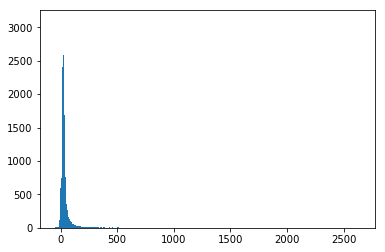

In [22]:
# Histogram
plt.hist(price1, 500)
plt.show()

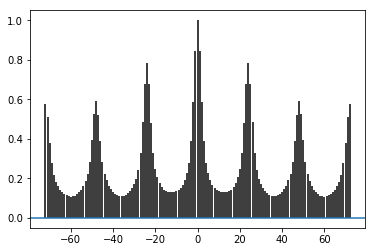

In [26]:
# Autocorrelation
plt.acorr(price1, maxlags=72)
plt.show()

In [31]:
np.mean(price1)

43.287123585229224

In [53]:
print hours[0].total_seconds()

3600.0


Coefficients: 
[ 0.89397646 -0.43995775  0.37008066  0.03476914 -0.02704969 -0.02591589]
Mean Squared Error 12.1798460299
Variance score:  -3.6697834849


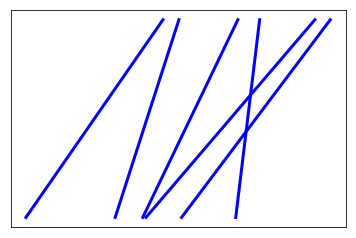

In [127]:
#extend this to get prices at different lags e.g. k-1, k-2, k-3
max_lag = 168
p_t = prices1[max_lag:]
X = []
for k in np.arange(0, max_lag, 24):
    t_k = np.array(prices1[(max_lag-k):-k], dtype='float')
    X.append(t_k)
X = np.swapaxes(np.array(X[1:]), 0, 1)
Y = [float(i) for i in p_t]
# use sklearn.LinearRegression to fit (X, Y)

trainingX = X[:-2]
testX = X[-2:]

trainingY = Y[:-2]
testY = Y[-2:]

regr = linear_model.LinearRegression()
regr.fit(trainingX, trainingY)

print "Coefficients: \n", regr.coef_
print "Mean Squared Error", np.mean((regr.predict(testX) - testY) ** 2)
print "Variance score: ", regr.score(testX, testY)

plt.plot(testX, regr.predict(testX), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()